In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


### Introduction


In this capstone, you will create a presentation about your findings in this OkCupid dataset.


The purpose of this capstone is to practice formulating questions and implementing Machine Learning techniques to answer those questions. We will give you guidance about the kinds of questions we asked, and the kinds of methods we used to answer those questions. But the questions you ask and how you answer them are entirely up to you. We're excited to see what kinds of different things you explore.
Compared to the other projects you have completed this far, we are requiring few restrictions on how you structure your code. The project is far more open-ended, and you should use your creativity. In addition, much of the code you write for later parts of this project will depend on how you decided to implement earlier parts. **Therefore, we strongly encourage you to read through the entire assignment before writing any code.**
________________

### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:


```
import pandas as pd
```

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import scipy.stats as stats

and then loading the csv into a DataFrame: 


```
df = pd.read_csv("profiles.csv")
```

In [2]:
df = pd.read_csv("profiles.csv")

### Explore the Data


Let's make sure we understand what these columns represent!

Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:


```
df.job.head()
```


You can also call `value_counts()` on a column to figure out what possible responses there are, and how many of each response there was.

In [3]:
print(df.columns)

print(df.body_type.value_counts())
df.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Visualize some of the Data


We can start to build graphs from the data by first importing Matplotlib:


```
from matplotlib import pyplot as plt
```


and then making some plots!

For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:


```
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()
```


Try this code in your own file and take a look at the histogram it produces!

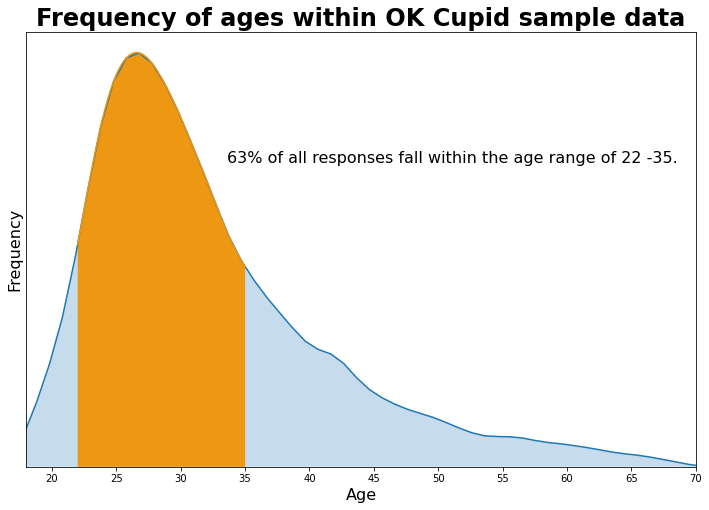

In [4]:
fig = plt.figure(figsize = (12, 8))
ax = sbn.kdeplot(data = df.age, shade = True)
sbn.kdeplot(data = df.age, shade = True, ax = ax, clip = [22,35], alpha = 1, color = '#EE9712')
plt.xlabel('Age', fontdict = {'fontsize': 16})
plt.ylabel('Frequency', fontdict = {'fontsize': 16})
plt.title('Frequency of ages within OK Cupid sample data', fontdict = {'fontweight': 'bold',
                                                                      'fontsize': 24})
plt.tick_params(axis = 'y',
               which = 'both',
               labelleft = False,
               length = 0)
plt.text(0.3, 0.7, '63% of all responses fall within the age range of 22 -35.',
         fontdict = {'fontsize': 16},
         transform=ax.transAxes)
plt.xlim([18, 70])
ax.set_xticks([x for x in range(20, 75, 5)])
ax.get_legend().remove()

In [5]:
print(df.age.describe())
probs = stats.gaussian_kde(df.age.tolist())
probs.integrate_box_1d(22, 35)


count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


0.6289616928920507

Text(0.5, 0.98, 'User Responses to Partaking in:')

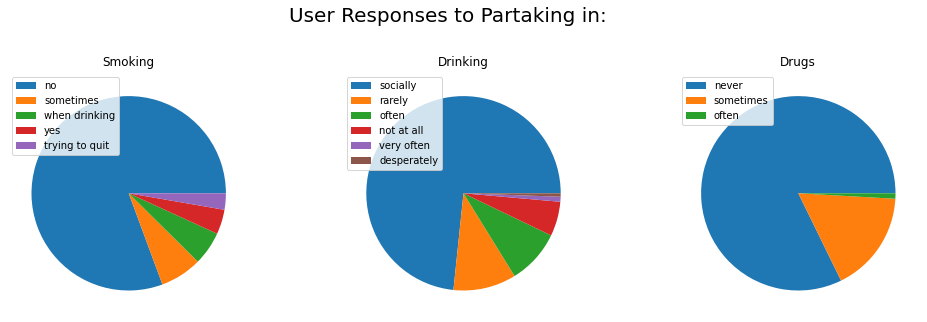

In [6]:
fig_2, (ax1, ax2, ax3) = plt.subplots(1,3)
fig_2.set_size_inches(17, 5)
plt.subplots_adjust(top = 0.8)
ax1.pie(df.smokes.value_counts(),
       labels = df.smokes.value_counts().index,
       labeldistance = None)
ax1.legend(loc = 2)
ax1.set_title('Smoking')
ax2.pie(df.drinks.value_counts(),
       labels = df.drinks.value_counts().index,
       labeldistance = None)
ax2.legend(loc = 2)
ax2.set_title('Drinking')
ax3.pie(df.drugs.value_counts(), 
       labels = df.drugs.value_counts().index,
       labeldistance = None)
ax3.legend(loc = 2)
ax3.set_title('Drugs')
fig_2.suptitle('User Responses to Partaking in:', fontsize = 20)

### Formulate a Question


As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:


```
df.sign.value_counts()
```


We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

In [7]:
df.sign = df.sign.replace(np.nan, 'No Answer')
df.sign = df.sign.apply(lambda x: x.split(' ')[0] if x != 'No Answer' else x)
df.sign.value_counts(dropna = True)

No Answer      11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: sign, dtype: int64

Text(0.5, 0.98, 'Zodiac signs of respondants')

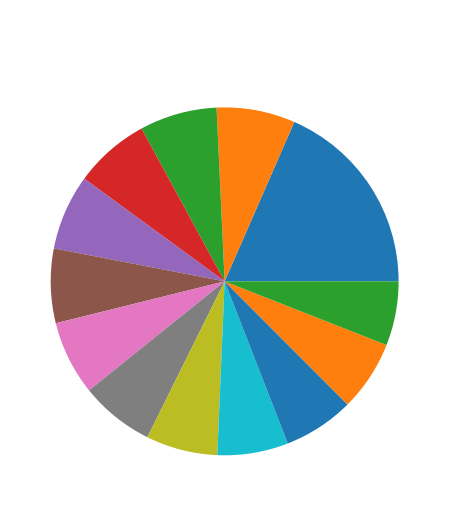

In [8]:


fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.pie(df.sign.value_counts(normalize = True, dropna = False),
       labels = df.sign.value_counts().index,
       textprops = {'color': 'white'})
fig.suptitle('Zodiac signs of respondants', fontsize = 24, color = 'white')

### Augment your Data


In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).


Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.


For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data. We used:


```
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}


all_data["drinks_code"] = all_data.drinks.map(drink_mapping)
```


These lines of code created a new column called 'drinks_code' that mapped the following `drinks` values to these numbers:


| drinks      | drinks_code |
|-------------|-------------|
| not at all  | 0           |
| rarely      | 1           |
| socially    | 2           |
| often       | 3           |
| very often  | 4           |
| desperately | 5           |


We did the same for `smokes` and `drugs`.

In [9]:
df.drugs.head()

0        never
1    sometimes
2          NaN
3          NaN
4        never
Name: drugs, dtype: object

In [10]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
smokes_mapping ={"no": 0, "when drinking": 1, "sometimes": 2, "trying to quit": 3, "yes": 4}
drugs_mapping ={"never": 0, "sometimes": 1, "often": 2}


df["drinks_code"] = df.drinks.map(drink_mapping)
df["smokes_code"] = df.smokes.map(smokes_mapping)
df["drugs_code"] = df.drugs.map(drugs_mapping)

#We also want to make numeric labels
sign_responses = list(df.sign.value_counts().index)
df['sign_code'] = df.sign.map(dict(zip(sign_responses, list(range(len(sign_responses))))))

We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`:


```
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


all_data["essay_len"] = all_essays.apply(lambda x: len(x)))
```


We also created a column with average word length and a column with the frequency of the words "I" or "me" appearing in the essays.

In [11]:
import string

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
def avg_word_length(lst):
    words = lst.split()
    if not len(words):
        return 0
    return float(sum(len(word) for word in words)) / len(words)
def calc_i_me_rate(lst):
    words = lst.split()
    if not len(words):
        return 0
    return float(words.count('i')+ words.count('me')) / len(words)

# Removing the NaNs
df[essay_cols] = df[essay_cols].replace(np.nan, '')
df[essay_cols] = df[essay_cols].replace('<br />|\\n', '', regex = True)
df[essay_cols] = df[essay_cols].replace(':', ' ', regex = True)
df[essay_cols].head()
# Combining the essays
all_essays = df[essay_cols].apply(lambda x: ' '.join(x), axis=1)
all_essays = all_essays.apply(lambda x: x.lower())
all_essays = all_essays.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))



df["essay_len"] = all_essays.apply(lambda x: len(x))
df['avg_word_length'] = all_essays.apply(avg_word_length)
df['rate_of_i_me'] = all_essays.apply(lambda x: calc_i_me_rate(x))




In [12]:
df.avg_word_length.describe()

count    59946.000000
mean         4.789850
std          2.353741
min          0.000000
25%          4.550000
50%          4.832361
75%          5.147612
max        447.250000
Name: avg_word_length, dtype: float64

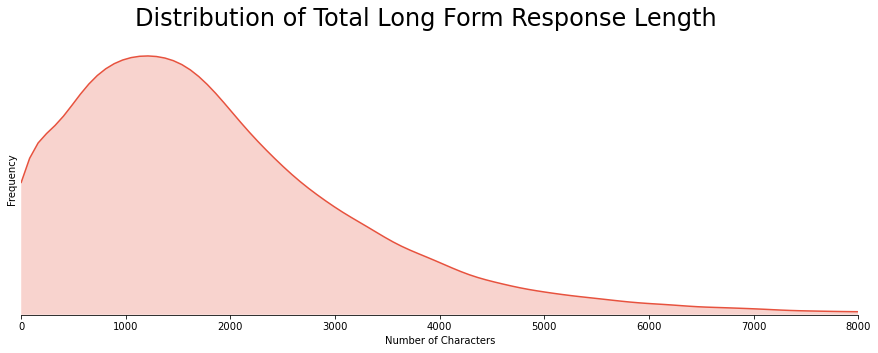

In [13]:
fig = plt.figure(figsize = (15, 5))
ax = sbn.kdeplot(data = df.essay_len, clip = [0, 8000], color = '#E7523E', shade = True)
plt.xlim(0, 8000)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
ax.get_legend().remove()
plt.tick_params(axis = 'y',
               which = 'both',
               labelleft = False,
               length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.suptitle('Distribution of Total Long Form Response Length', fontsize = 24)
plt.savefig('Essay_len_dist.png', transparent = True)

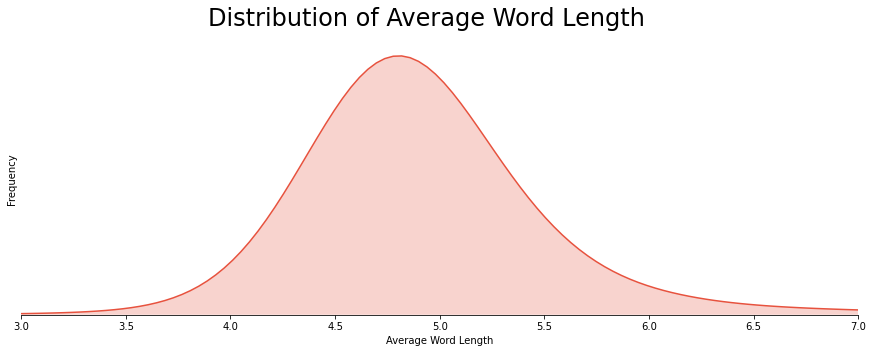

In [14]:
fig_2 = plt.figure(figsize = (15, 5))
ax = sbn.kdeplot(data = df.avg_word_length, clip = (3,7), color = '#E7523E', shade = True)
plt.xlim(3,7)
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
ax.get_legend().remove()
plt.tick_params(axis = 'y',
               which = 'both',
               labelleft = False,
               length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
fig_2.suptitle('Distribution of Average Word Length', fontsize = 24)
plt.savefig('Avg_word_len_dist.png', transparent = True)

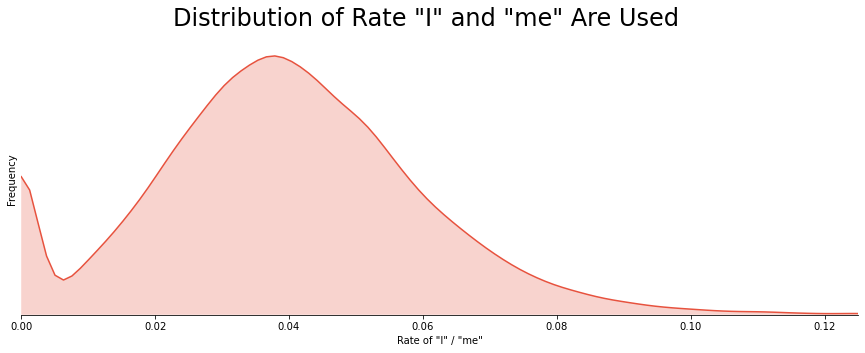

In [15]:
fig_3 = plt.figure(figsize = (15, 5))
ax = sbn.kdeplot(data = df.rate_of_i_me, clip = (0,0.125), color = '#E7523E', shade = True)
plt.xlim(0,0.125)
plt.xlabel('Rate of "I" / "me"')
plt.ylabel('Frequency') 
ax.get_legend().remove()
plt.tick_params(axis = 'y',
               which = 'both',
               labelleft = False,
               length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
fig_3.suptitle('Distribution of Rate "I" and "me" Are Used', fontsize = 24)
plt.savefig('rate_i_me_dist.png', transparent = True)

### Normalize your Data!


In order to get accurate results, we should make sure our numerical data all has the same weight.


For our Zodiac features, we used:


```
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
```

**Normalization Model**

In our case we are going to use a StandardScaler as there are some datapoints which are extreme outliers so this method reduces their impact

In [16]:
import sklearn.preprocessing as preprocessing
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length','rate_of_i_me', 'sign_code']]
feature_data = feature_data.dropna()
sign_labels = feature_data.sign_code
feature_data = feature_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length','rate_of_i_me']]


x = feature_data.values
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
feature_data.head()

,smokes_code,drinks_code,drugs_code,essay_len,avg_word_length,rate_of_i_me
0,1.55160,0.192311,-0.457207,0.221055,-0.031698,-0.051420
1,-0.42115,1.537983,1.956334,-0.370349,-0.248504,1.446319
2,-0.42115,0.192311,-0.457207,-0.775603,0.482377,-0.806581
3,-0.42115,0.192311,-0.457207,-0.473252,0.848358,-0.930372
4,-0.42115,-2.499033,-0.457207,0.071903,0.018382,1.140107


### Use Classification Techniques


We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?

# Split the Data into Training and Test sets

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(feature_data, sign_labels, test_size = 0.2)


# Classification Teqniques

First we will use a K Nearest Neighbors classifier and get the score for the test data for k from one to two hundred

In [18]:
kn_classifier_scores = list()
for k in range(1, 200):
    kn_classifier = KNeighborsClassifier(n_neighbors = k)
    kn_classifier.fit(train_data, train_labels)
    kn_classifier_scores.append(kn_classifier.score(test_data, test_labels))

# Plot the results

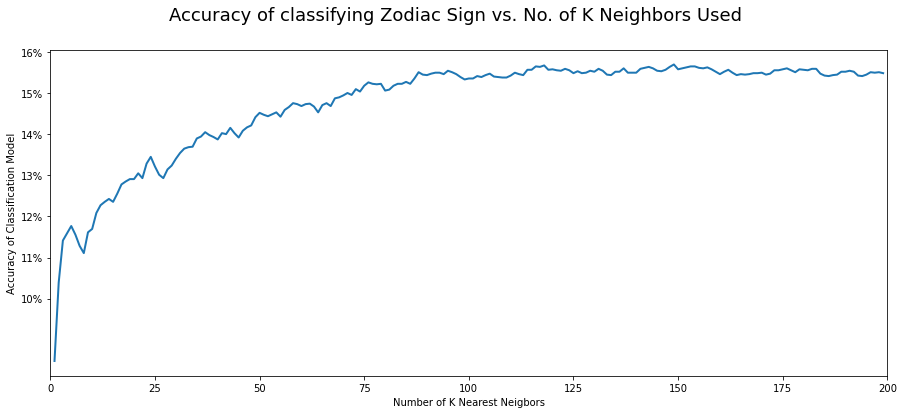

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(range(1, 200), kn_classifier_scores, lw = 2)
plt.xlim(0, 200)
ax.set_yticks([0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16])
ax.set_yticklabels(['10%', '11%', '12%', '13%', '14%', '15%', '16%'])
plt.xlabel('Number of K Nearest Neigbors')
plt.ylabel('Accuracy of Classification Model')
fig.suptitle('Accuracy of classifying Zodiac Sign vs. No. of K Neighbors Used', fontsize = 18)
plt.savefig('Zodiac_accuracy.png', transparent = True)

# Removing no response data

We think that our accuracy being so much higher than chance is just a correlation with no response to the essays and no response to zodiac sign

The solution is to see the correlation if we remove the 

In [20]:
feature_data2 = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length','rate_of_i_me', 'sign_code']]
feature_data2.sign_code = feature_data2.sign_code.replace(0, np.nan)
feature_data2 = feature_data2.dropna()
sign_labels2 = feature_data2.sign_code
feature_data2 = feature_data2[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length','rate_of_i_me']]


x = feature_data2.values
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)


feature_data2 = pd.DataFrame(x_scaled, columns=feature_data.columns)

train_data2, test_data2, train_labels2, test_labels2 = train_test_split(feature_data2, sign_labels2, test_size = 0.2)
kn_classifier_scores2 = list()
for k in range(1, 200):
    kn_classifier2 = KNeighborsClassifier(n_neighbors = k)
    kn_classifier2.fit(train_data2, train_labels2)
    kn_classifier_scores2.append(kn_classifier2.score(test_data2, test_labels2))


C:\Users\sully\miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


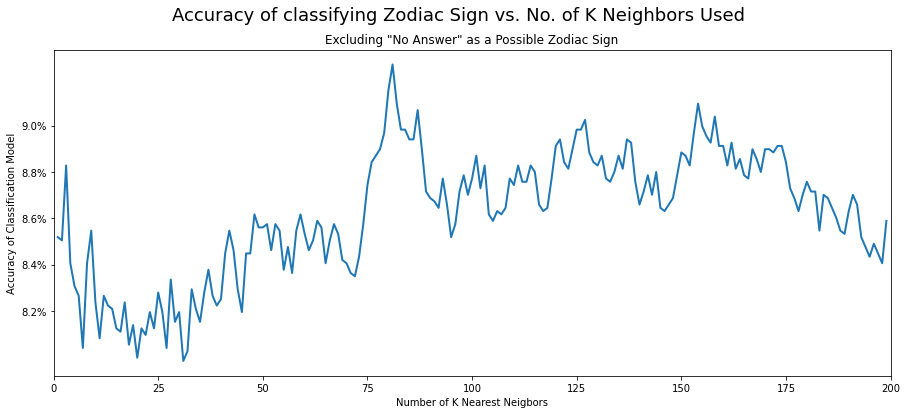

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(range(1, 200), kn_classifier_scores2, lw = 2)
plt.xlim(0, 200)
ax.set_yticks([0.082, 0.084, 0.086, 0.088, 0.09])
ax.set_yticklabels(['8.2%', '8.4%', '8.6%', '8.8%', '9.0%'])
plt.xlabel('Number of K Nearest Neigbors')
plt.ylabel('Accuracy of Classification Model')
fig.suptitle('Accuracy of classifying Zodiac Sign vs. No. of K Neighbors Used', fontsize = 18)
plt.title('Excluding "No Answer" as a Possible Zodiac Sign')
plt.savefig('Zodiac_accuracy2.png', transparent = True)

In [22]:
print(stats.describe(kn_classifier_scores2))
print(stats.ttest_1samp(kn_classifier_scores2, 0.0833333333))

DescribeResult(nobs=199, minmax=(0.0798425639583919, 0.09263424233904977), mean=0.08620838236727636, variance=7.2677095125672475e-06, skewness=-0.4197467446441147, kurtosis=-0.5196244906968683)
Ttest_1sampResult(statistic=15.044335813953879, pvalue=1.3020767849862312e-34)


### Use Regression Techniques


We have learned how to perform Multiple Linear Regression by playing with StreetEasy apartment data. Is there a way we can apply the techniques we learned to this dataset?


Some questions we used regression to tackle were:


- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?


We also learned about K-Nearest Neighbors Regression. Which form of regression works better to answer your question?

In [24]:
df[['income', 'age']].head(20) #let's take a look at the data

,income,age
0,-1,22
1,80000,35
2,-1,38
3,20000,23
4,-1,29
5,-1,29
6,-1,32
7,-1,31
8,-1,24
9,-1,37


In [28]:
income_feature_data = df[['essay_len', 'avg_word_length', 'income']]
income_feature_data.income = income_feature_data.income.replace(-1, np.nan)
income_feature_data = income_feature_data.dropna()

print(str(float(len(income_feature_data)) / len(df)))

0.19190604877723283


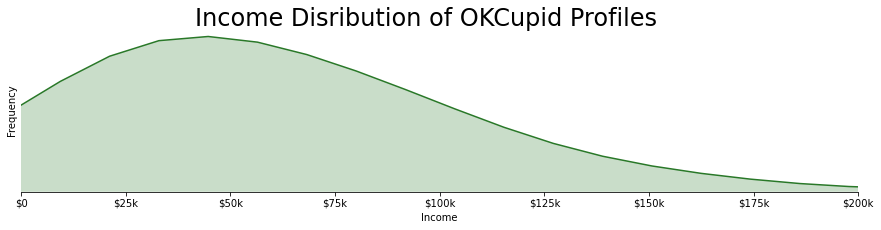

In [46]:
fig = plt.figure(figsize = (15, 3))
ax = sbn.kdeplot(income_feature_data.income, color = '#297828', shade = True)
plt.xlim(0, 200000)
ax.set_xticklabels(['$0', '$25k', '$50k', '$75k', '$100k', '$125k', '$150k', '$175k', '$200k'])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_legend().remove()
plt.xlabel('Income')
plt.ylabel('Frequency')
fig.suptitle('Income Disribution of OKCupid Profiles', fontsize = 24)
plt.savefig('Income_distribution.png', transparent = True)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

X_train_income, X_test_income, y_train_income, y_test_income =\
    train_test_split(income_feature_data[['essay_len', 'avg_word_length']], 
                     income_feature_data['income'], test_size = 0.2)

lr_income = LinearRegression()
lr_income.fit(X_train_income, y_train_income)
print(lr_income.coef_)
print(lr_income.score(X_test_income, y_test_income))

[-2.18997615e+00  1.01371491e+04]
-0.0030584891384495268


In [52]:
knr_income = KNeighborsRegressor(n_neighbors = 100)
knr_income.fit(X_train_income, y_train_income)
print(knr_income.get_params())
print(knr_income.score(X_test_income, y_test_income))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 100, 'p': 2, 'weights': 'uniform'}
-0.014355700539905534


In [54]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(df.rate_of_i_me, df.age, test_size = 0.2)

In [60]:
type(X_train_age)

pandas.core.series.Series

In [61]:

lr_age = LinearRegression()
lr_age.fit(np.array(X_train_age).reshape(-1, 1), y_train_age)
print(lr_age.coef_)
print(lr_age.score(np.array(X_test_age).reshape(-1, 1), y_test_age))

[-16.77863845]
0.0008748294597701323


In [63]:

knr_age = KNeighborsRegressor(n_neighbors = 100)
knr_age.fit(np.array(X_train_age).reshape(-1, 1), y_train_age)
print(knr_age.score(np.array(X_test_age).reshape(-1, 1), y_test_age))

-0.011678923051111179


### Analyze the Accuracy, Precision and Recall


After you have trained your model and run it, you will probably be curious about how well it did.


Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed.


For our question of classifying Zodiac signs, one graph we produced showed classification accuracy versus `k` (for K-Nearest Neighbors):
![accuracy vs k](https://s3.amazonaws.com/codecademy-content/programs/machine-learning/capstone/Zodiac_Accuracy.png)


The accuracy we would expect from predicting a Zodiac sign by randomly selecting one would be 1/12, or 0.0833. Our model did not significantly outperform this number. We were unimpressed.

Precision and Recall are not very useful for the dataset as the accuracy is already low.


### Create your Presentation


We want to see:


- at least two graphs containing exploration of the dataset
- a statement of your question (or questions!) and how you arrived there 
- the explanation of at least two new columns you created and how you did it
- the comparison between two classification approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)


Good luck!